In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

# Encoder

In [2]:
original_dim = 28 * 28
encoding_dim = 16

def encoder_model(dim):
  inputs = tf.keras.Input(shape=(784,))
  x = tf.keras.layers.Dense(256, activation='relu')(inputs)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dense(dim, activation='sigmoid')(x)

  encoder = tf.keras.Model(inputs, x, name='encoder')
  print(encoder.summary())
  return encoder

# Decoder

In [3]:
def decoder_model(dim):
  latent_inputs = tf.keras.Input(shape=(dim,), name='z_sampling')

  x = tf.keras.layers.Dense(128, activation='relu')(latent_inputs)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  outputs = tf.keras.layers.Dense(original_dim, activation='sigmoid')(x)

  decoder = tf.keras.Model(latent_inputs, outputs, name='decoder')
  print(decoder.summary())
  return decoder

# Autoencoder

In [4]:
def autoencoder_model(dim):
  inputs = tf.keras.Input(shape=(784,))
  encoder = encoder_model(dim)
  decoder = decoder_model(dim)
  # instantiate autoencoder model
  outputs = decoder(encoder(inputs))
  autoencoder = tf.keras.Model(inputs, outputs, name='autoencoder_mlp')
  print(autoencoder.summary())
  return autoencoder, encoder, decoder

# Plot function

In [5]:
def plot(encoder, decoder, x_test):
  encoded_imgs = encoder.predict(x_test)
  decoded_imgs = decoder.predict(encoded_imgs)

  n = 10  # How many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # Display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

In [6]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [7]:
autoencoder, encoder, decoder = autoencoder_model(encoding_dim)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
Total params: 235,920
Trainable params: 235,920
Non-trainable params: 0
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 16)]              0         
_______________________________

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 5ms/step - loss: 0.3488 - val_loss: 0.2630
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2633 - val_loss: 0.2630
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2631 - val_loss: 0.2632
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2633 - val_loss: 0.2629
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2632 - val_loss: 0.2629
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2628 - val_loss: 0.2626
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2528 - val_loss: 0.2295
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2237 - val_loss: 0.1908
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1787 - val_loss: 0.1582
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1547 - val_loss: 0.1427

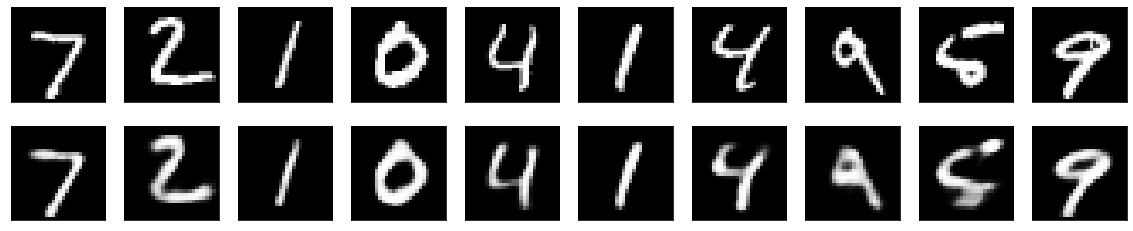

In [9]:
plot(encoder, decoder, x_test)

In [10]:
encoding_dim = 32
autoencoder, encoder, decoder = autoencoder_model(encoding_dim)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 32)]              0         
_______________________________

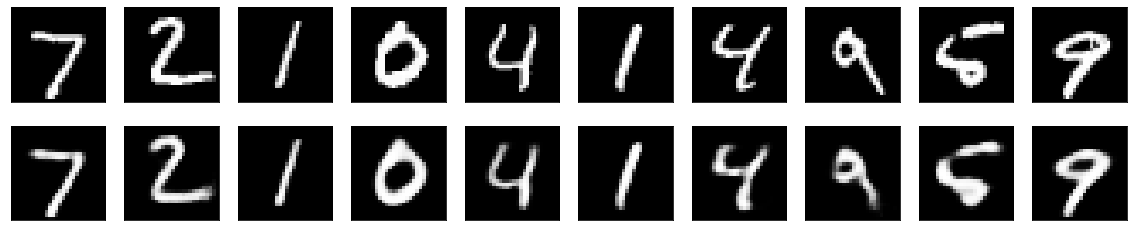

In [11]:
plot(encoder, decoder, x_test)

In [12]:
encoding_dim = 64
autoencoder, encoder, decoder = autoencoder_model(encoding_dim)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 64)]              0         
_______________________________

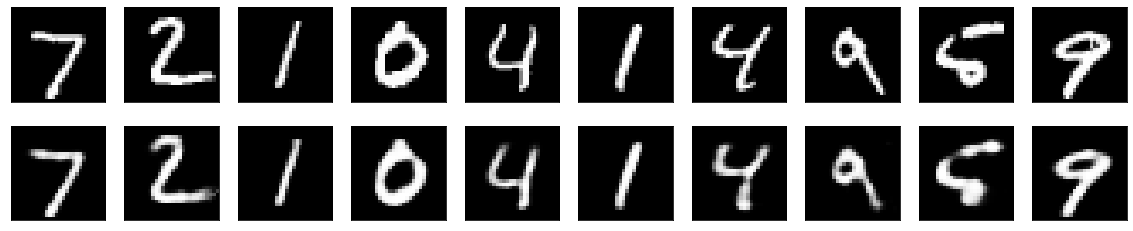

In [13]:
plot(encoder, decoder, x_test)

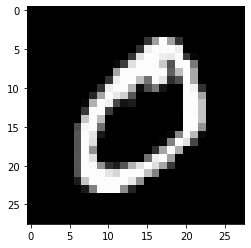

In [14]:
image = x_train[1].reshape((28,28))
plt.imshow(image)
plt.show()

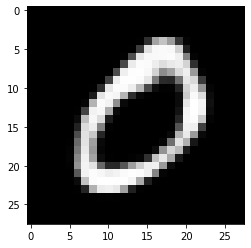

In [15]:
reconstructed = autoencoder.predict((x_train[1])[np.newaxis,...])
plt.imshow(reconstructed.reshape((28,28)))

In [16]:
encoded = encoder.predict((x_train[1])[np.newaxis,...])
encoded = np.round(encoded)
print(encoded)

[[1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.
  0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]]


# Noise 

In [17]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * K.random_normal(shape=tf.shape(x_train), mean=0., stddev=1)
x_test_noisy = x_test + noise_factor * K.random_normal(shape=tf.shape(x_test), mean=0., stddev=1)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

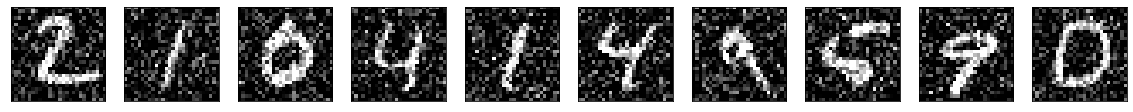

In [18]:
n = 10
plt.figure(figsize=(20,2))
for i in range(1, n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [19]:
encoding_dim = 64
autoencoder, encoder, decoder = autoencoder_model(encoding_dim)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 64)]              0         
_______________________________

# Plot denoised

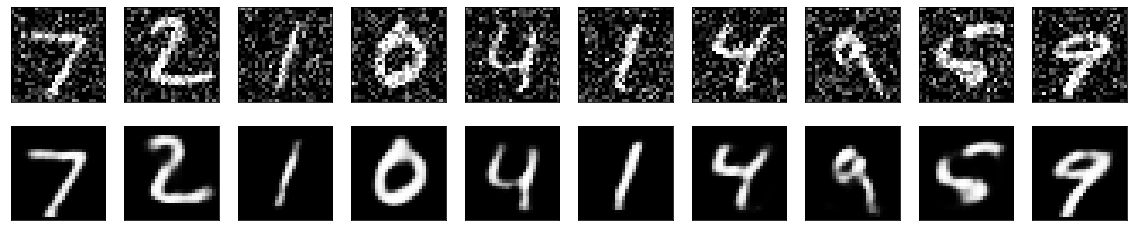

In [20]:
plot(encoder, decoder, x_test_noisy)

# Best model Encoder

In [21]:
inputs = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1,1), activation='relu', padding='SAME')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, kernel_size=(2,2), strides=(1,1), activation='relu', padding='SAME')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.BatchNormalization()(x)

shape = x.shape

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10,activation='sigmoid')(x)

encoder = tf.keras.Model(inputs, x, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0   

# Best model decoder

In [22]:
latent_inputs = tf.keras.Input(shape=(10,), name='z_sampling')

units = shape[1] * shape[2] * shape[3]

x = tf.keras.layers.Dense(units, activation='relu')(latent_inputs)
x = tf.keras.layers.Reshape((shape[1], shape[2], shape[3]), name='decode_reshape')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D(2, interpolation='nearest')(x)
x = tf.keras.layers.Conv2D(64, kernel_size=(2,2), strides=(1,1), activation='relu', padding='SAME')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D(2, interpolation='bilinear')(x)
x = tf.keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1,1), activation='relu', padding='SAME')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
outputs = tf.keras.layers.Conv2D(1, (2,2), activation='sigmoid', padding='SAME')(x)

decoder = tf.keras.Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 10)]              0         
_________________________________________________________________
dense_25 (Dense)             (None, 3136)              34496     
_________________________________________________________________
decode_reshape (Reshape)     (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0   

In [23]:
inputs = tf.keras.Input(shape=(28,28,1))

# instantiate autoencoder model
outputs = decoder(encoder(inputs))
autoencoder = tf.keras.Model(inputs, outputs, name='autoencoder_cnn')
autoencoder.summary()

Model: "autoencoder_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 10)                40170     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         59937     
Total params: 100,107
Trainable params: 99,595
Non-trainable params: 512
_________________________________________________________________


In [24]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/50
235/235 [==============================] - 39s 35ms/step - loss: 0.4240 - val_loss: 0.3731
Epoch 2/50
235/235 [==============================] - 8s 32ms/step - loss: 0.1558 - val_loss: 0.2105
Epoch 3/50
235/235 [==============================] - 8s 33ms/step - loss: 0.1415 - val_loss: 0.1492
Epoch 4/50
235/235 [==============================] - 8s 33ms/step - loss: 0.1325 - val_loss: 0.1437
Epoch 5/50
235/235 [==============================] - 8s 33ms/step - loss: 0.1271 - val_loss: 0.1385
Epoch 6/50
235/235 [==============================] - 8s 34ms/step - loss: 0.1241 - val_loss: 0.1390
Epoch 7/50
235/235 [==============================] - 8s 33ms/step - loss: 0.1224 - val_loss: 0.1376
Epoch 8/50
235/235 [==============================] - 8s 33ms/step - loss: 0.1192 - val_loss: 0.1370
Epoch 9/50
235/235 [==============================] - 8s 34ms/step - loss: 0.1181 - val_loss: 0.1425
Epoch 10/50
235/235 [==============================]

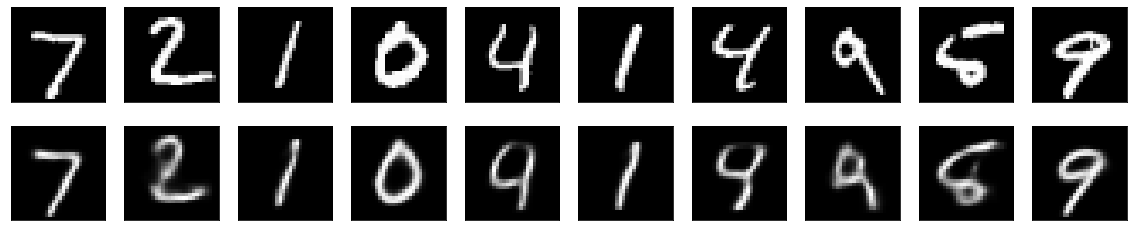

In [25]:
plot(encoder, decoder, x_test)

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

def gini(arr):
    _ , counts = np.unique(arr, return_counts=True)
    gini = 1 - ((counts / arr.size) ** 2).sum()
    return gini


hashes = np.round(encoder.predict(x_test))
distance_matrix = manhattan_distances(hashes)
cluster = AgglomerativeClustering(n_clusters=10, affinity='precomputed', linkage='complete')
hash_labels = cluster.fit_predict(distance_matrix)

gini_indexes = [gini(y_test[hash_labels==i]) for i in range(10)]
print('Gini indexes: ', *gini_indexes)
print(f'Mean gini: {sum(gini_indexes) / 10}')

Gini indexes:  0.868842130889463 0.8133377640525099 0.7692854515617926 0.8875861393140652 0.7210870041639272 0.8151736534173668 0.6162441128478005 0.6815908390101362 0.778082334821312 0.6755172657298214
Mean gini: 0.7626746695808195


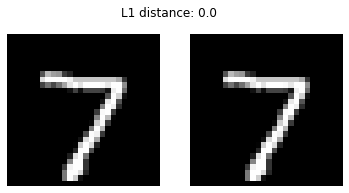

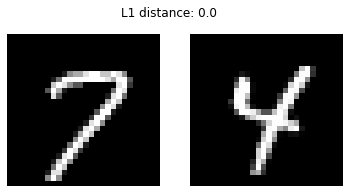

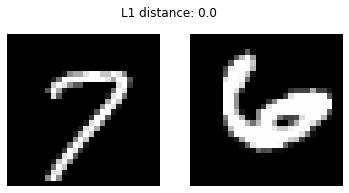

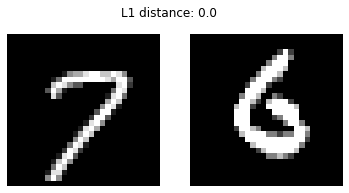

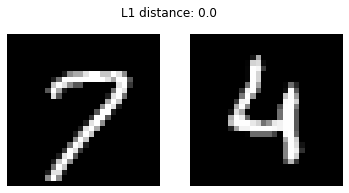

In [41]:
distance_matrix[np.tril_indices_from(distance_matrix, 0)] = 0
idx = np.unravel_index(np.argsort(distance_matrix.ravel())[:5], distance_matrix.shape)

for i in range(5):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    image_1 = x_test[idx[0][i]]
    axes[0].imshow(image_1, cmap='gray')
    axes[0].set_axis_off()
    image_2 = x_test[idx[1][i]]
    axes[1].imshow(image_2, cmap='gray')
    axes[1].set_axis_off()
    plt.suptitle(f'L1 distance: {distance_matrix[idx[0][i], idx[1][i]]}')
    plt.show()